# Multi-channel Data

## Visualizing the dataset

The goal of this jupyter notebook is to illustrate how to load the train and validation sets for the MR reconstruction challenge. Note that k-space is centered and image are saved slice-wise. Also, the multi-channel data was partially Fourier acquired.

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import os
import glob
import sys

# Add our module to the path
sys.path.append("../Modules/")
from utils import sum_of_squares

In [2]:
# Train Set 
kspace_files = np.asarray(glob.glob("/media/roberto/DATA/GDrive/MR-Data/Normative-Raw-Data/Multi-Coil-Reconstruction-Challenge/Slices/Train-mc/*.npy"))
indexes = np.arange(kspace_files.size,dtype = int)
np.random.shuffle(indexes)
kspace_files_train = kspace_files[indexes]

# Validation set
kspace_files_val = np.asarray(glob.glob("/media/roberto/DATA/GDrive/MR-Data/Normative-Raw-Data/Multi-Coil-Reconstruction-Challenge/Slices/Val-mc//*.npy"))


print(kspace_files_train[0])
print(len(kspace_files_train))
print 
print(kspace_files_val[0])
print(len(kspace_files_val))

/media/roberto/DATA/GDrive/MR-Data/Normative-Raw-Data/Multi-Coil-Reconstruction-Challenge/Slices/Train-mc/e14692s5_P14848.7_image_slice202.jpg.npy
10240
/media/roberto/DATA/GDrive/MR-Data/Normative-Raw-Data/Multi-Coil-Reconstruction-Challenge/Slices/Val-mc/e14155s3_P69120.7_image_slice0.jpg.npy
2560


## Sample Train k-space and image reconstruction

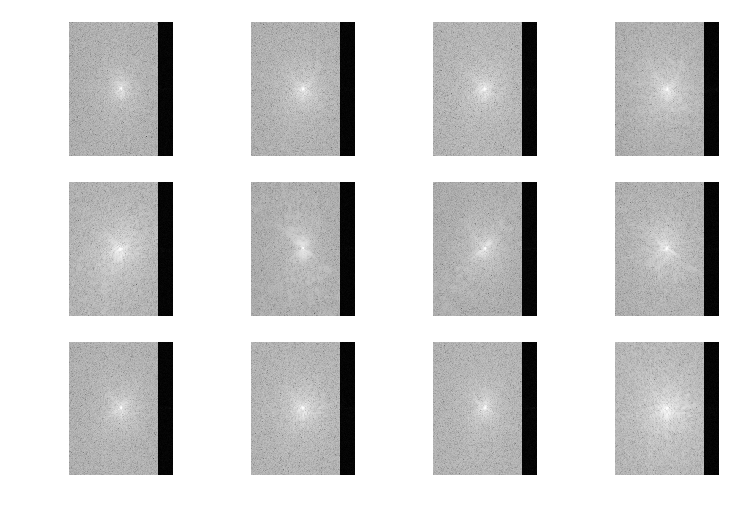

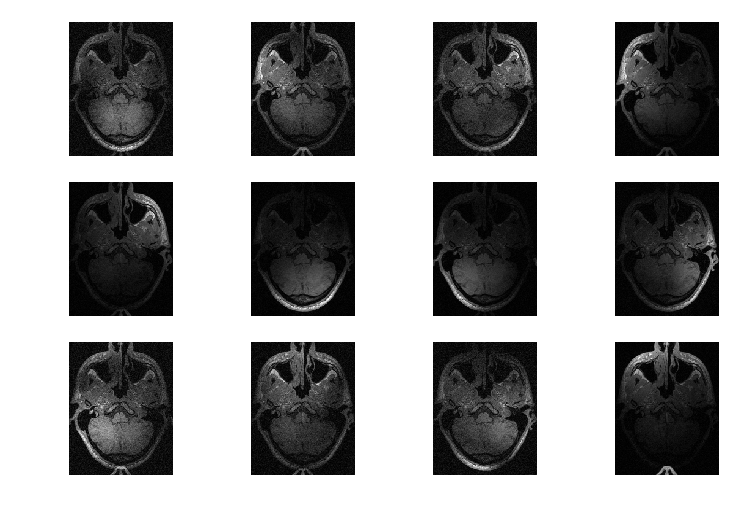

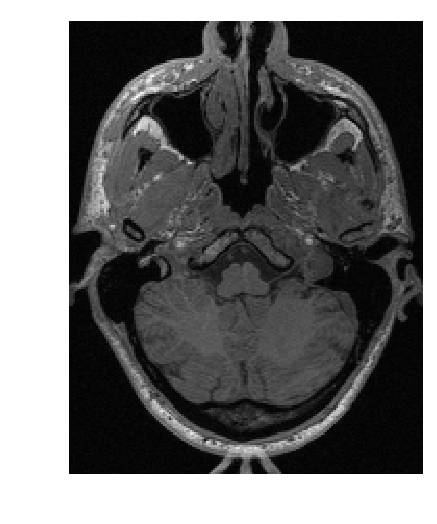

In [3]:
sample_kspace_train = np.load(kspace_files_train[200])

# Converting to complex
sample_kspace_train = sample_kspace_train[:,:,::2] + 1j*sample_kspace_train[:,:,1::2]

# Displaying channels' k-spaces
plt.figure(dpi = 150)
for ii in range(12):
    plt.subplot(3,4,ii+1)
    plt.imshow(np.log(1+np.abs(sample_kspace_train[:,:,ii])),cmap = "gray")
    plt.axis("off")
plt.show()

sample_rec_train = np.fft.ifft2(sample_kspace_train,axes = (0,1))
# Displaying channels' images
plt.figure(dpi = 150)
for ii in range(12):
    plt.subplot(3,4,ii+1)
    plt.imshow(np.abs(sample_rec_train[:,:,ii]),cmap = "gray")
    plt.axis("off")
plt.show()

plt.figure(dpi = 150)
plt.imshow(sum_of_squares(sample_rec_train),cmap = "gray")
plt.axis("off")
plt.show()

## Sample Validation k-space and image reconstruction

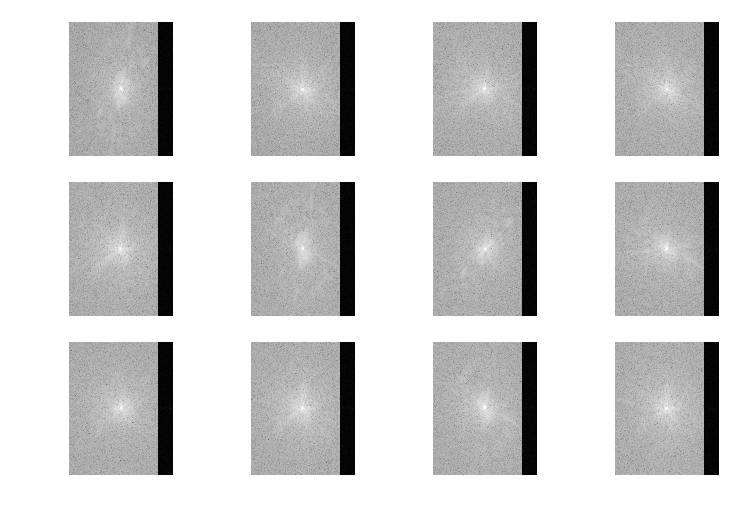

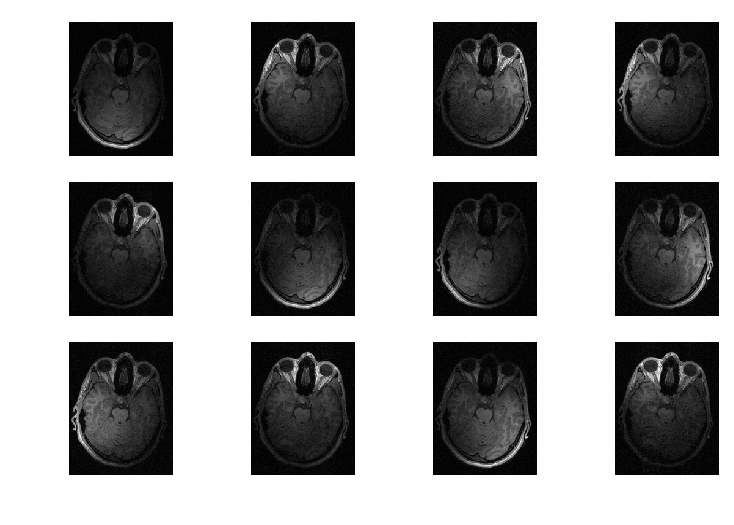

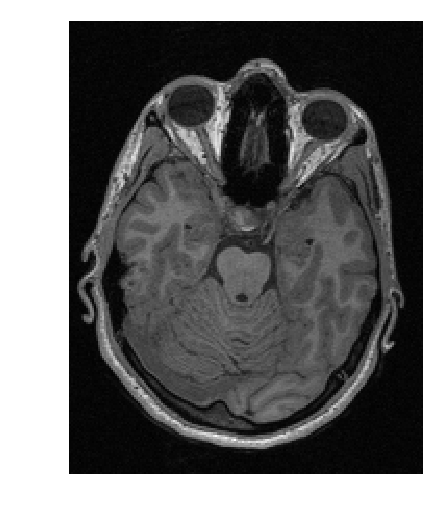

In [4]:
sample_kspace_val = np.load(kspace_files_val[300])

# Converting to complex
sample_kspace_val = sample_kspace_val[:,:,::2] + 1j*sample_kspace_val[:,:,1::2]

# Displaying channels' k-spaces
plt.figure(dpi = 150)
for ii in range(12):
    plt.subplot(3,4,ii+1)
    plt.imshow(np.log(1+np.abs(sample_kspace_val[:,:,ii])),cmap = "gray")
    plt.axis("off")
plt.show()

sample_rec_val = np.fft.ifft2(sample_kspace_val,axes = (0,1))
# Displaying channels' images
plt.figure(dpi = 150)
for ii in range(12):
    plt.subplot(3,4,ii+1)
    plt.imshow(np.abs(sample_rec_val[:,:,ii]),cmap = "gray")
    plt.axis("off")
plt.show()

plt.figure(dpi = 150)
plt.imshow(sum_of_squares(sample_rec_val),cmap = "gray")
plt.axis("off")
plt.show()